In [1]:
import pandas as pd
import numpy as np

from gensim.models import KeyedVectors,Word2Vec

In [2]:
from sklearn.model_selection import train_test_split

from keras import Model
from keras import Sequential
from keras.layers import Dense

In [3]:
model = Word2Vec.load('Word2Vec_large/Word2Vec_large.model')

In [4]:
word_vectors = model.wv

In [5]:
vector_dict = {word: word_vectors.get_vector(word) for word in word_vectors.index_to_key}
df = pd.DataFrame(vector_dict).T
display(df)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
.,0.254665,0.875933,-1.899508,4.789082,-1.471520,-0.562328,-0.523664,-2.834435,2.990827,-4.324205,...,-1.264526,-0.217451,-1.283172,-1.482940,1.219368,0.314076,1.192515,1.677462,-2.620194,-1.355744
",",1.161235,-0.682670,-1.465878,0.155612,0.097459,1.769291,0.144464,0.097331,1.394362,0.521570,...,0.913775,0.314089,1.450204,0.678172,0.216116,-2.673327,-0.974180,0.468902,1.222414,-1.046039
ve,3.445365,0.825515,-1.736841,1.196350,-1.056142,-0.087305,1.558233,1.318982,0.405798,0.934647,...,2.100268,-0.122658,1.601747,-0.029856,0.997222,-1.917047,0.707618,0.701514,2.467121,-1.672413
bir,-0.172556,1.313794,-3.523644,6.495718,-2.764080,-1.163113,3.804061,4.531719,2.786563,-2.389860,...,-1.821487,0.326128,0.220640,2.255653,0.227249,-2.917162,5.032547,-0.048248,1.760508,-2.642090
',-5.261195,-4.021674,-1.267869,-0.073685,1.744716,0.952679,3.200137,2.146037,1.228366,-4.183214,...,-1.504875,-1.367065,-2.456206,3.953644,-2.191184,-1.597368,-2.707572,1.823025,-4.339454,-1.353123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
çizmenin,1.572780,-0.319487,-1.508718,-2.000626,-0.900361,-0.001110,0.969891,0.099717,-0.133650,1.413757,...,1.439299,0.203127,0.655694,-0.697270,0.185472,-2.480558,2.352597,2.013679,-2.774488,0.268372
içiyorduk,-0.748368,-1.997761,1.607301,3.281187,0.314207,-0.241214,0.982115,2.740381,2.087121,-0.925714,...,2.121984,1.314872,0.992071,-3.357798,-0.463882,-0.319192,-0.482984,0.442482,0.200306,1.964017
grozni,0.098749,0.001487,-0.662382,-1.490521,5.304553,-3.026492,0.300804,0.606914,-0.981822,-2.440869,...,0.466737,-1.276476,-1.720090,2.674812,0.071339,1.981940,0.650170,-0.437919,-2.834544,0.361035
aygıtlarını,0.352949,0.564794,-2.161407,-1.377775,-0.661701,-0.823138,1.748147,1.765917,0.956550,0.934872,...,-0.318349,2.656436,-0.945235,-1.278576,-1.725038,-1.785241,-1.884165,-2.744139,-1.238732,0.487878


In [6]:
class AutoEncoders(Model):

    def __init__(self, encode_layers:list , decode_layers:list):
        super().__init__()
        
        activ_func = "relu"
        
        self.encoder = Sequential(
            [ Dense(layer_size, activation=activ_func) for layer_size in encode_layers]
        )

        self.decoder = Sequential(
            [ Dense(layer_size, activation=activ_func) for layer_size in decode_layers[:-1]] + [Dense(decode_layers[-1], activation="sigmoid")]
        )


    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
INPUT = list(vector_dict.values())
OUTPUT = list(vector_dict.keys())
X = np.asarray(INPUT)
y = np.asarray(OUTPUT)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, shuffle = False)

In [8]:
x_train = pd.DataFrame(X_train)
x_test = pd.DataFrame(X_test)

In [9]:
from sklearn.preprocessing import MinMaxScaler

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
  
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [10]:
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.543574,0.522551,0.387363,0.657923,0.421210,0.498859,0.608872,0.354652,0.627127,0.287718,...,0.458753,0.503176,0.484411,0.447338,0.596153,0.417414,0.539016,0.578160,0.470960,0.379014
1,0.588201,0.449047,0.405117,0.476013,0.497705,0.609081,0.635946,0.481540,0.548546,0.507007,...,0.556590,0.527718,0.620054,0.550802,0.552615,0.264590,0.427626,0.514829,0.640234,0.394780
2,0.700641,0.520173,0.394023,0.516873,0.441462,0.521315,0.693235,0.534413,0.499887,0.525700,...,0.609881,0.507553,0.627574,0.516905,0.586512,0.303279,0.514087,0.527018,0.695065,0.362894
3,0.522544,0.543200,0.320865,0.724926,0.358191,0.470458,0.784241,0.673461,0.617072,0.375254,...,0.433737,0.528274,0.559037,0.626325,0.553098,0.252117,0.736432,0.487729,0.663938,0.313531
4,0.272049,0.291580,0.413224,0.467011,0.578017,0.570477,0.759769,0.570208,0.540375,0.294098,...,0.447958,0.450095,0.426199,0.707616,0.448146,0.319632,0.338513,0.585788,0.395223,0.379148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89569,0.704415,0.437912,0.414273,0.409552,0.269020,0.672356,0.717532,0.379985,0.514790,0.509477,...,0.459735,0.350633,0.518055,0.492257,0.531788,0.426174,0.142698,0.499435,0.651322,0.409356
89570,0.680957,0.625360,0.334480,0.491534,0.558443,0.472914,0.625811,0.410014,0.482144,0.306462,...,0.349588,0.506818,0.561727,0.547122,0.622111,0.233095,0.502845,0.500930,0.613491,0.395483
89571,0.541830,0.484834,0.502908,0.401608,0.505869,0.574244,0.624188,0.467006,0.540342,0.457418,...,0.522708,0.522499,0.516214,0.506403,0.578941,0.301935,0.434966,0.463729,0.615304,0.395289
89572,0.528055,0.489929,0.543095,0.431630,0.453667,0.563156,0.640583,0.477875,0.438709,0.252881,...,0.557198,0.448145,0.618443,0.554321,0.558997,0.471031,0.506739,0.381176,0.532576,0.484192


In [11]:
input_size = X.shape[1]

In [12]:
auto_encoder = AutoEncoders(encode_layers=[256,128,64],decode_layers=[128,256])
auto_encoder.compile(
    loss='mse',
    metrics=['mse'],
    optimizer='adam'
)

In [13]:
history = auto_encoder.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=15,
    batch_size=32,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 3/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 6/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 7/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 8/15
2800/2800 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 9/15
2800/2800 ━━━━━━━━━━━━━━━━━━━

# Auto-Encoder Results

In [14]:
encoder_layer = auto_encoder.get_layer('sequential')

In [15]:
encoded_data = pd.DataFrame(encoder_layer.predict(x_train_scaled))

2800/2800 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step


In [16]:
# Reduced dimension in training data/vectors
encoded_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.805277,0.0,0.431574,0.0,0.721054,0.474940,0.0,0.0,0.486164,...,0.0,0.221907,0.0,0.647813,0.157399,0.400329,0.0,0.493162,0.257867,0.0
1,0.0,0.460386,0.0,0.416211,0.0,0.576586,0.379104,0.0,0.0,0.308557,...,0.0,0.325874,0.0,0.413226,0.547065,0.654988,0.0,0.429912,0.502780,0.0
2,0.0,0.298675,0.0,0.512640,0.0,0.527677,0.426747,0.0,0.0,0.380836,...,0.0,0.496834,0.0,0.586222,0.563332,0.979358,0.0,0.340198,0.424182,0.0
3,0.0,0.114221,0.0,0.446664,0.0,0.586579,0.321885,0.0,0.0,0.686458,...,0.0,0.377182,0.0,0.374181,0.505593,0.658747,0.0,0.644133,0.358346,0.0
4,0.0,0.390831,0.0,0.672475,0.0,0.189016,0.194121,0.0,0.0,0.474862,...,0.0,0.192851,0.0,0.679572,0.842150,0.145832,0.0,0.166516,0.079112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89569,0.0,0.340025,0.0,0.563940,0.0,0.301276,0.272537,0.0,0.0,0.521789,...,0.0,0.473969,0.0,0.371852,0.520327,0.437418,0.0,0.595463,0.577538,0.0
89570,0.0,0.823781,0.0,0.391084,0.0,0.728412,0.401503,0.0,0.0,0.347265,...,0.0,0.418319,0.0,0.856500,0.813955,0.471919,0.0,0.719072,0.241438,0.0
89571,0.0,0.528607,0.0,0.582081,0.0,0.781883,0.433587,0.0,0.0,0.623377,...,0.0,0.574209,0.0,0.475946,0.800159,0.582070,0.0,0.329791,0.273939,0.0
89572,0.0,1.006744,0.0,0.566929,0.0,0.614021,0.416213,0.0,0.0,0.363276,...,0.0,0.473240,0.0,0.629926,0.656491,0.503292,0.0,0.407289,0.621512,0.0


In [17]:
decoded_data = pd.DataFrame(auto_encoder.predict(x_test_scaled))

1200/1200 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step


In [18]:
decoded_data

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.478494,0.495533,0.513389,0.515088,0.516656,0.547504,0.684896,0.430353,0.360824,0.472151,...,0.530500,0.600747,0.474778,0.520689,0.619635,0.382874,0.505453,0.487474,0.546278,0.382508
1,0.623370,0.490022,0.456417,0.533000,0.550607,0.580134,0.689384,0.552783,0.421406,0.502527,...,0.589755,0.408517,0.543263,0.442705,0.517905,0.356387,0.548950,0.481628,0.539871,0.478704
2,0.606058,0.601603,0.539803,0.409828,0.471018,0.468289,0.672857,0.409153,0.503106,0.474713,...,0.551461,0.444441,0.560430,0.399511,0.550043,0.509345,0.526659,0.502641,0.548477,0.358652
3,0.559761,0.403966,0.459326,0.450736,0.450128,0.516677,0.684617,0.436318,0.383834,0.583346,...,0.491948,0.469291,0.590012,0.564914,0.611989,0.380513,0.413656,0.517959,0.552228,0.434602
4,0.540453,0.573707,0.480611,0.493569,0.419959,0.477306,0.664742,0.526992,0.529997,0.473037,...,0.456533,0.538820,0.526097,0.377485,0.505231,0.447489,0.489943,0.529766,0.578402,0.453986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,0.565179,0.464512,0.492865,0.401822,0.443629,0.542851,0.637002,0.438529,0.492293,0.502179,...,0.471946,0.479429,0.594293,0.473689,0.549804,0.384912,0.511634,0.546982,0.564578,0.405499
38386,0.537410,0.454166,0.492617,0.533122,0.494346,0.555654,0.674562,0.527180,0.480045,0.475227,...,0.552289,0.574918,0.510095,0.483944,0.483539,0.342769,0.444972,0.517816,0.627593,0.507248
38387,0.534430,0.403132,0.466141,0.463028,0.614578,0.486634,0.660465,0.491546,0.378988,0.476136,...,0.531051,0.564042,0.531135,0.567838,0.492904,0.443390,0.525069,0.517007,0.507897,0.454723
38388,0.577045,0.510525,0.408466,0.422233,0.429256,0.527959,0.742717,0.531692,0.446150,0.446501,...,0.464761,0.667143,0.435443,0.515893,0.469978,0.365187,0.429190,0.449082,0.575049,0.431247


In [19]:
# Labelling reduced dim. data
reduced_train_data = encoded_data
reduced_train_data["label"] = y_train

In [20]:
reduced_train_data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.805277,0.0,0.431574,0.0,0.721054,0.474940,0.0,0.0,0.486164,...,0.221907,0.0,0.647813,0.157399,0.400329,0.0,0.493162,0.257867,0.0,.
1,0.0,0.460386,0.0,0.416211,0.0,0.576586,0.379104,0.0,0.0,0.308557,...,0.325874,0.0,0.413226,0.547065,0.654988,0.0,0.429912,0.502780,0.0,","
2,0.0,0.298675,0.0,0.512640,0.0,0.527677,0.426747,0.0,0.0,0.380836,...,0.496834,0.0,0.586222,0.563332,0.979358,0.0,0.340198,0.424182,0.0,ve
3,0.0,0.114221,0.0,0.446664,0.0,0.586579,0.321885,0.0,0.0,0.686458,...,0.377182,0.0,0.374181,0.505593,0.658747,0.0,0.644133,0.358346,0.0,bir
4,0.0,0.390831,0.0,0.672475,0.0,0.189016,0.194121,0.0,0.0,0.474862,...,0.192851,0.0,0.679572,0.842150,0.145832,0.0,0.166516,0.079112,0.0,'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89569,0.0,0.340025,0.0,0.563940,0.0,0.301276,0.272537,0.0,0.0,0.521789,...,0.473969,0.0,0.371852,0.520327,0.437418,0.0,0.595463,0.577538,0.0,tanımalarını
89570,0.0,0.823781,0.0,0.391084,0.0,0.728412,0.401503,0.0,0.0,0.347265,...,0.418319,0.0,0.856500,0.813955,0.471919,0.0,0.719072,0.241438,0.0,profilimde
89571,0.0,0.528607,0.0,0.582081,0.0,0.781883,0.433587,0.0,0.0,0.623377,...,0.574209,0.0,0.475946,0.800159,0.582070,0.0,0.329791,0.273939,0.0,medeniyetten
89572,0.0,1.006744,0.0,0.566929,0.0,0.614021,0.416213,0.0,0.0,0.363276,...,0.473240,0.0,0.629926,0.656491,0.503292,0.0,0.407289,0.621512,0.0,notla


# Model Re-Training

In [21]:
word_vectors_dict = {}
for _, row in reduced_train_data.iterrows():
    word = row['label']
    vector = row.drop('label').tolist()
    word_vectors_dict[word] = vector

In [22]:
word_vectors_dict

{'.': [0.0,
  0.8052771091461182,
  0.0,
  0.4315737187862396,
  0.0,
  0.721053957939148,
  0.4749399423599243,
  0.0,
  0.0,
  0.4861643314361572,
  0.0,
  0.0,
  0.0,
  0.37889230251312256,
  0.0,
  0.0,
  0.0,
  0.39846372604370117,
  0.2561466693878174,
  0.0,
  0.0,
  0.14499978721141815,
  0.41919076442718506,
  0.2638483941555023,
  0.4185863733291626,
  0.23474165797233582,
  0.44778135418891907,
  0.5119331479072571,
  0.5743170380592346,
  0.3241657018661499,
  0.0,
  0.0,
  0.5538821220397949,
  0.4485449492931366,
  0.16773992776870728,
  0.38710570335388184,
  0.0,
  0.08456501364707947,
  0.4644896686077118,
  0.31580406427383423,
  0.0,
  0.5795446634292603,
  0.0,
  0.0,
  0.6783767938613892,
  0.29656535387039185,
  0.6375163197517395,
  0.02982545644044876,
  0.29380500316619873,
  0.15332017838954926,
  0.0,
  0.36257845163345337,
  0.3981185555458069,
  0.0,
  0.0,
  0.2219066619873047,
  0.0,
  0.6478129029273987,
  0.15739887952804565,
  0.4003293514251709,
  0.0

In [23]:
reduced_word_vectors = KeyedVectors(vector_size=len(reduced_train_data.columns) - 1)
reduced_word_vectors.add_vectors(keys=list(word_vectors_dict.keys()), weights=list(word_vectors_dict.values()))

In [24]:
model = Word2Vec(vector_size=300, window=5, min_count=1, workers=4)
model.wv = reduced_word_vectors

In [25]:
model.train([], total_examples=model.corpus_count, epochs=model.epochs)

(0, 0)

In [26]:
model.save("w2v_reduced.model")

In [27]:
load_model = model

In [28]:
load_model.wv.most_similar('krallar', topn=10)

[('şövalyeler', 0.9794954657554626),
 ('rahipler', 0.9775940775871277),
 ('hükümdarlar', 0.9745736122131348),
 ('kralları', 0.9743978977203369),
 ('soylular', 0.9734817147254944),
 ('papazlar', 0.9721378684043884),
 ('azizler', 0.9720315933227539),
 ('padişahlar', 0.9716789722442627),
 ('büyücüler', 0.9705069065093994),
 ('kralların', 0.9696013927459717)]

# Stemmer

In [53]:
word = "gözler"
threshold = 0.6

In [54]:
current_word = word
roots = []

for i in range(len(word)):
    current_word = word[:len(word)- i]
    roots.append(current_word)

In [55]:
scores = []

for root in roots:
    try:
        scores.append(model.wv.similarity(word, root))
    except:
        scores.append(0.0)

In [56]:
min_value = float('inf')
max_value = float('-inf')

for x in scores:
    if x != 0:
        min_value = min(min_value, x)
        max_value = max(max_value, x)

scores = [(x - min_value) / (max_value - min_value) if x != 0 else 0 for x in scores]

print(scores)


[1.0, 0.5645667, 0, 0.677119, 0.56265163, 0.0]


In [57]:
root_index = 0

for index,score in list(enumerate(scores))[::-1]:
    if score > threshold:
        print(f"Root: {roots[index]}, Score: {score}")
        root_index = index
        break

Root: göz, Score: 0.6771190166473389


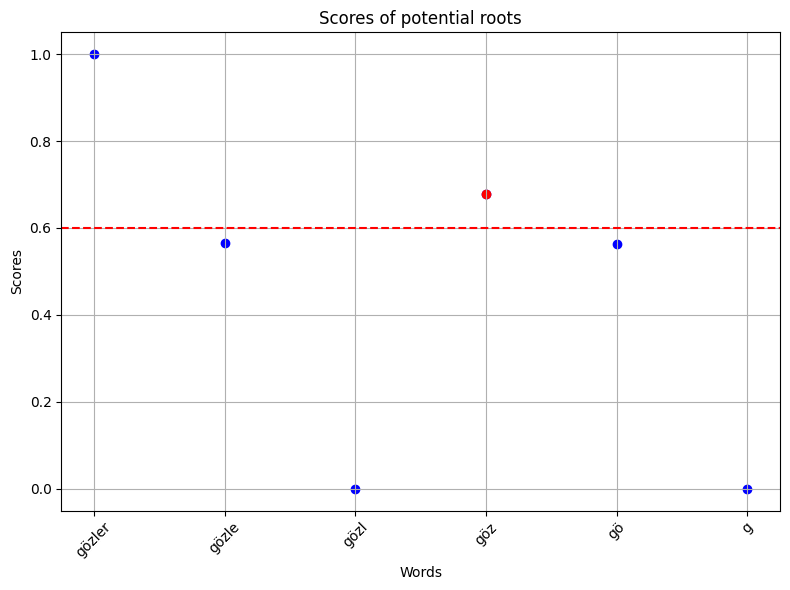

In [58]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(roots, scores, color='blue')

# Adding titles and labels
plt.title('Scores of potential roots')
plt.xlabel('Words')
plt.ylabel('Scores')

plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(roots[root_index], scores[root_index], color='red', label='Red Point')



# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()